In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [120]:
# df=pd.read_csv("annealing_stats_20221217115922.csv") #traffic lights set to red initially
# df=pd.read_csv("annealing_stats_20221218125739.csv") #first speed experiment
# df=pd.read_csv("annealing_stats_20221218164142.csv")#useless (negative speed)

# df=pd.read_csv("annealing_stats_20221218213107.csv")#1 car per frame
df=pd.read_csv("annealing_stats_20221219014015.csv")#10 cars per frame
# df=pd.read_csv("annealing_stats_20221219014157.csv")#30 cars per frame

# df=pd.read_csv("annealing_stats_20221219014250.csv")#60 cars per frame
df=pd.read_csv("genetic_stats_20221219161101.csv")#test
df

,Main index,Population,Unit,Small index,Speed limit(km/h),Traffic light 0_0,Traffic light 0_1,Traffic light 0_2,Traffic light 0_3,Traffic light 1_0,...,Traffic light 2_2,Traffic light 2_3,Traffic light 3_0,Traffic light 3_1,Traffic light 3_2,Traffic light 3_3,Flow,Collisions,Stopped,Iterations
0,1,0,0,0.0,23.142857,0.1,0.2,0.6,0.7,0.10,...,0.60,0.70,0.1,0.2,0.6,0.7,24.000000,0.500000,False,1000.0
1,1,0,0,1.0,23.142857,0.1,0.2,0.6,0.7,0.10,...,0.60,0.70,0.1,0.2,0.6,0.7,26.000000,0.000000,False,1000.0
2,1,0,0,2.0,23.142857,0.1,0.2,0.6,0.7,0.10,...,0.60,0.70,0.1,0.2,0.6,0.7,28.000000,1.000000,False,1000.0
3,1,0,0,NaN,23.142857,0.1,0.2,0.6,0.7,0.10,...,0.60,0.70,0.1,0.2,0.6,0.7,26.000000,0.500000,NaN,NaN
4,1,0,1,0.0,27.771429,0.1,0.2,0.6,0.7,0.10,...,0.60,0.70,0.1,0.2,0.6,0.7,32.000000,0.250000,False,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,10,1,3,NaN,27.771429,0.1,0.2,0.6,0.7,0.71,...,0.60,0.70,0.1,0.2,0.6,0.7,33.333333,0.833333,NaN,NaN
396,10,1,4,0.0,27.771429,0.1,0.2,0.6,0.7,0.71,...,0.82,0.92,0.1,0.2,0.6,0.7,35.000000,0.000000,False,1000.0
397,10,1,4,1.0,27.771429,0.1,0.2,0.6,0.7,0.71,...,0.82,0.92,0.1,0.2,0.6,0.7,32.000000,1.000000,False,1000.0
398,10,1,4,2.0,27.771429,0.1,0.2,0.6,0.7,0.71,...,0.82,0.92,0.1,0.2,0.6,0.7,30.000000,1.000000,False,1000.0


In [121]:
main_results = df[df["Small index"].isna()]
main_results["Cost"]=main_results["Collisions"]*np.log(main_results["Collisions"]+1)-main_results["Flow"]
main_results

C:\Users\Maciek\AppData\Local\Temp\ipykernel_23008\3705816949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_results["Cost"]=main_results["Collisions"]*np.log(main_results["Collisions"]+1)-main_results["Flow"]


,Main index,Population,Unit,Small index,Speed limit(km/h),Traffic light 0_0,Traffic light 0_1,Traffic light 0_2,Traffic light 0_3,Traffic light 1_0,...,Traffic light 2_3,Traffic light 3_0,Traffic light 3_1,Traffic light 3_2,Traffic light 3_3,Flow,Collisions,Stopped,Iterations,Cost
3,1,0,0,NaN,23.142857,0.10,0.20,0.60,0.70,0.10,...,0.70,0.1,0.2,0.6,0.7,26.000000,0.500000,NaN,NaN,-25.797267
7,1,0,1,NaN,27.771429,0.10,0.20,0.60,0.70,0.10,...,0.70,0.1,0.2,0.6,0.7,32.000000,1.250000,NaN,NaN,-30.986337
11,1,0,2,NaN,27.771429,0.10,0.20,0.60,0.70,0.10,...,0.70,0.1,0.2,0.6,0.7,29.000000,0.666667,NaN,NaN,-28.659450
15,1,0,3,NaN,27.771429,0.10,0.20,0.60,0.70,0.10,...,0.70,0.1,0.2,0.6,0.7,32.000000,0.583333,NaN,NaN,-31.731939
19,1,0,4,NaN,27.771429,0.10,0.20,0.60,0.70,0.10,...,0.70,0.1,0.2,0.6,0.7,23.333333,0.666667,NaN,NaN,-22.992783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,10,1,0,NaN,27.771429,0.10,0.20,0.60,0.70,0.71,...,0.70,0.1,0.2,0.6,0.7,29.666667,0.916667,NaN,NaN,-29.070295
387,10,1,1,NaN,27.771429,0.42,0.52,0.92,0.02,0.71,...,0.70,0.1,0.2,0.6,0.7,30.000000,0.416667,NaN,NaN,-29.854872
391,10,1,2,NaN,32.400000,0.10,0.20,0.60,0.70,0.71,...,0.70,0.1,0.2,0.6,0.7,36.666667,0.416667,NaN,NaN,-36.521539
395,10,1,3,NaN,27.771429,0.10,0.20,0.60,0.70,0.71,...,0.70,0.1,0.2,0.6,0.7,33.333333,0.833333,NaN,NaN,-32.828220


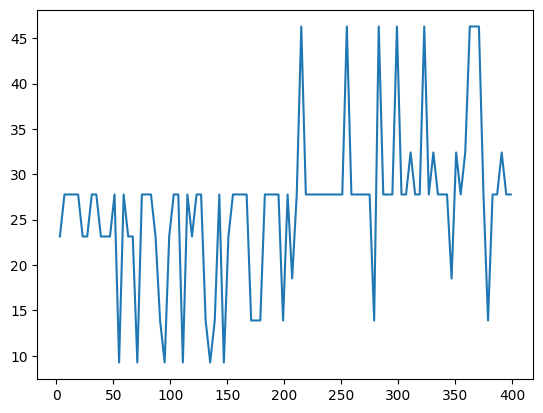

In [122]:
plt.plot(main_results["Speed limit(km/h)"])

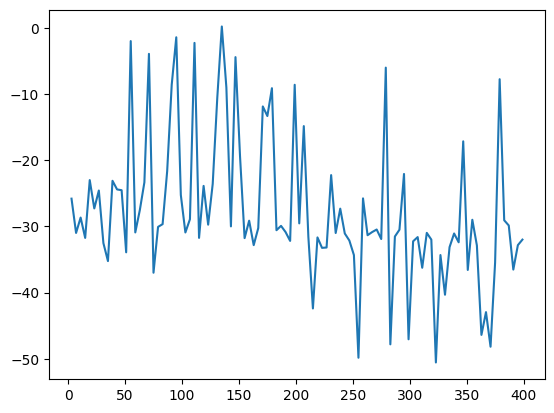

In [123]:
plt.plot(main_results.Cost)

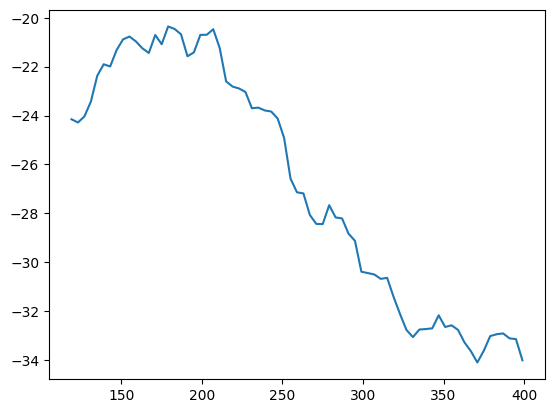

In [124]:
plt.plot(main_results.Cost.rolling(30).mean())

C:\Users\Maciek\AppData\Local\Temp\ipykernel_23008\2350215084.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  diff=np.array(main_results.Cost[1:])-np.array(main_results.Cost[:-1])


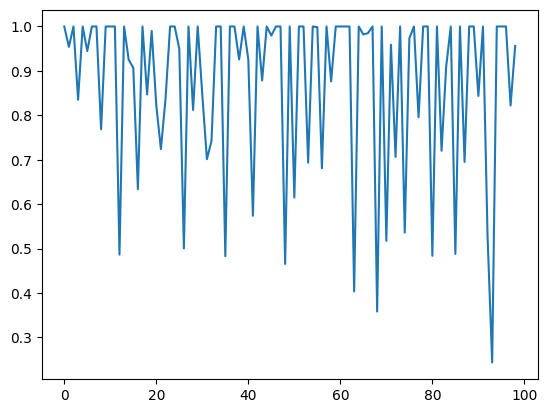

In [125]:
initial_temp=50
cooling_rate=0.99
temp=[initial_temp*cooling_rate**i for i in range(int(main_results.shape[0]-1))]

diff=np.array(main_results.Cost[1:])-np.array(main_results.Cost[:-1])

prob=np.exp(-diff/temp)
prob=[p if p<=1  else 1 for p in prob ]

plt.plot(prob)

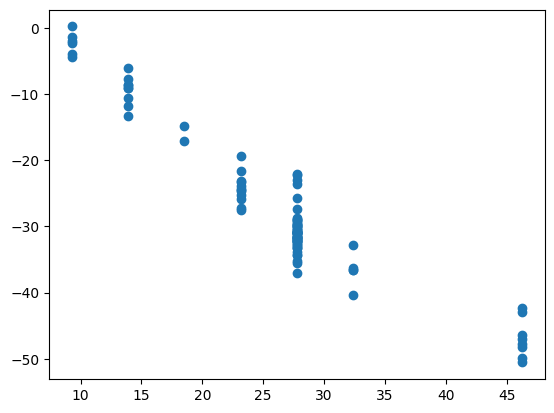

In [126]:
plt.scatter(main_results["Speed limit(km/h)"], main_results["Cost"])


Only for speed

0.05


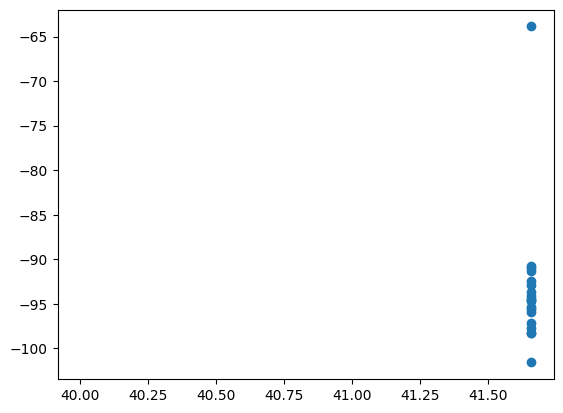

In [112]:
regression_data = main_results[~((main_results["Speed limit(km/h)"]>=50) & (main_results["Cost"]>-140))]
regression_data = regression_data[regression_data["Speed limit(km/h)"]>40]
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process.kernels import DotProduct, Product
score = 0
alphas = [0.05,0.15,0.25,0.5,0.75,1,2,5,10]
X, y = regression_data["Speed limit(km/h)"], regression_data["Cost"]
X=np.array(X).reshape(-1, 1)
for alpha in alphas:
    kernel = Product(DotProduct(),DotProduct())
    krr = KernelRidge(alpha=alpha, kernel=kernel)
    krr.fit(X, y)
    new_score = krr.score(X, y)
    if new_score>score:
        score = new_score
        best_alpha = alpha
kernel = Product(DotProduct(),DotProduct())
krr = KernelRidge(alpha=best_alpha, kernel=kernel)
print(best_alpha)
krr.fit(X, y)
x_new = np.array(range(40,int(np.max(regression_data["Speed limit(km/h)"])))).reshape(-1, 1)
y_new = krr.predict(x_new)
new_score = krr.score(X, y)
if new_score>score:
    score = new_score
    best_alpha = alpha
plt.scatter(regression_data["Speed limit(km/h)"], regression_data["Cost"])
plt.plot(x_new, y_new)


In [83]:
best = main_results[main_results["Cost"]==np.min(main_results.Cost)]
traffic_lights =  best.iloc[:,3:19].values
light_cycles = [traffic_lights[0][4*i:4*i+4] for i in range(4)]
light_cycles

[array([0.03898666, 0.43910906, 0.89202024, 0.85740052]),
 array([0.44021337, 0.5893193 , 0.36604127, 0.99821665]),
 array([0.88630003, 0.78345755, 0.29602475, 0.34180375]),
 array([0.30974582, 0.09650156, 0.8159249 , 0.75671079])]

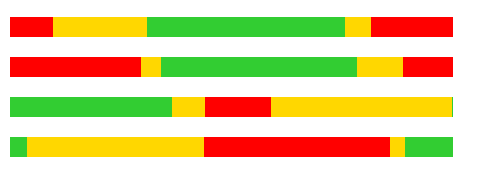

In [84]:
starting_color=["Red","Red","Green","Green"]
plot_data=light_cycles
colors=["Limegreen","Gold","r","Gold"]
plt.figure(figsize=(6,2))
for j in range(4):
    plot_data[j]=np.sort(np.append(plot_data[j],1))
    
    for i in range(5):
        if starting_color[j]=="Red":
            col=colors[i] if i<4 else colors[0] 
        else:
            col=colors[i+2] if i<2 else colors[i-2] 
        
        plt.barh([j],plot_data[j][-i-1],color=col, height=1/2)
plt.axis('off')
plt.show()

In [85]:
plot_data

[array([0.03898666, 0.43910906, 0.85740052, 0.89202024, 1.        ]),
 array([0.36604127, 0.44021337, 0.5893193 , 0.99821665, 1.        ]),
 array([0.29602475, 0.34180375, 0.78345755, 0.88630003, 1.        ]),
 array([0.09650156, 0.30974582, 0.75671079, 0.8159249 , 1.        ])]

In [86]:
best5=main_results.sort_values(["Cost"]).head()
best5

,Main index,Small index,Speed limit(km/h),Traffic light 0_0,Traffic light 0_1,Traffic light 0_2,Traffic light 0_3,Traffic light 1_0,Traffic light 1_1,Traffic light 1_2,...,Traffic light 2_3,Traffic light 3_0,Traffic light 3_1,Traffic light 3_2,Traffic light 3_3,Flow,Collisions,Stopped,Iterations,Cost
1688,421,NaN,25.0,0.038987,0.439109,0.892020,0.857401,0.440213,0.589319,0.366041,...,0.341804,0.309746,0.096502,0.815925,0.756711,168.000000,1.750000,NaN,NaN,-166.229698
3000,749,NaN,25.0,0.038987,0.439109,0.892020,0.857401,0.440213,0.589319,0.366041,...,0.341804,0.388573,0.175328,0.894752,0.835537,166.666667,2.083333,NaN,NaN,-164.320810
3816,953,NaN,25.0,0.038987,0.439109,0.892020,0.857401,0.440213,0.589319,0.366041,...,0.341804,0.388573,0.175328,0.894752,0.835537,167.000000,2.416667,NaN,NaN,-164.030725
3732,932,NaN,25.0,0.038987,0.439109,0.892020,0.857401,0.440213,0.589319,0.366041,...,0.341804,0.388573,0.175328,0.894752,0.835537,166.666667,3.250000,NaN,NaN,-161.964180
388,96,NaN,25.0,0.238423,0.155859,0.091457,0.793879,0.547783,0.306214,0.567783,...,0.287653,0.245107,0.190476,0.208531,0.456843,164.000000,2.416667,NaN,NaN,-161.030725


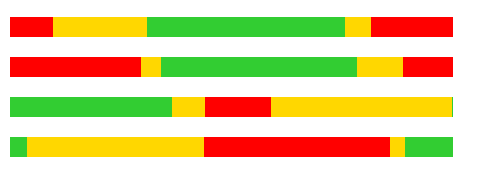

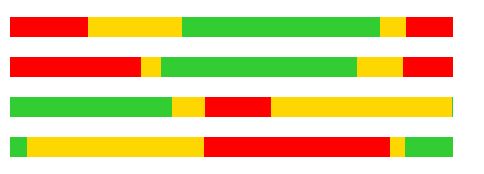

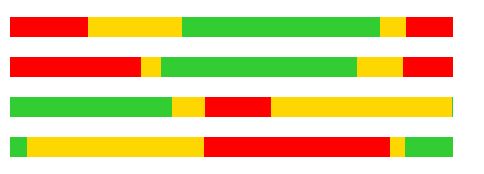

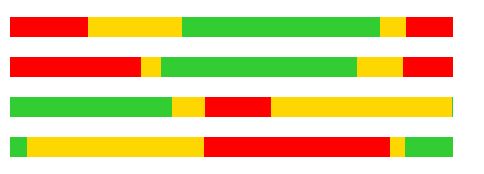

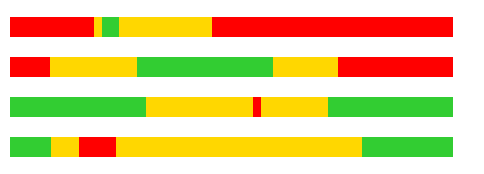

In [87]:
for k in range(5):
    value=best5.iloc[k,3:19].values
    light_cycles = [value[4*l:4*l+4] for l in range(4)]
    starting_color=["Red","Red","Green","Green"]
    plot_data=light_cycles
    colors=["Limegreen","Gold","r","Gold"]
    plt.figure(figsize=(6,2))
    for j in range(4):
        plot_data[j]=np.sort(np.append(plot_data[j],1))
        
        for i in range(5):
            if starting_color[j]=="Red":
                col=colors[i] if i<4 else colors[0] 
            else:
                col=colors[i+2] if i<2 else colors[i-2] 
            
            plt.barh([j],plot_data[j][-i-1],color=col, height=1/2)
    plt.axis('off')
    plt.show()